# LIBRARIES

Import the (sub)modules

In [16]:
import yfinance as yf
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (30,10)
warnings.filterwarnings('ignore')

# DATA PREPERATION

The interval is selected as is randomly

In [17]:
df = yf.download(tickers='ETH-USD', start="2020-07-01", end="2021-07-01")

[*********************100%***********************]  1 of 1 completed


## First Glance

In [18]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-30,227.968430,229.476807,224.815186,226.315002,226.315002,6094093001
2020-07-01,226.134583,232.756119,224.835739,231.113419,231.113419,6463737443
2020-07-02,231.288910,232.396881,225.461960,229.392197,229.392197,6212210566
2020-07-03,229.318954,229.629318,224.913971,225.387070,225.387070,5109032700
2020-07-04,225.288483,230.054138,225.133316,229.074112,229.074112,5228310135


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,366.0,1.230527e+03,9.654342e+02,2.252885e+02,3.877120e+02,7.303807e+02,1.910672e+03,4.174636e+03
High,366.0,1.284571e+03,1.014545e+03,2.294768e+02,3.978805e+02,7.475398e+02,1.973081e+03,4.362351e+03
Low,366.0,1.169896e+03,9.064469e+02,2.245445e+02,3.787104e+02,7.051295e+02,1.811608e+03,3.785849e+03
Close,366.0,1.236098e+03,9.654816e+02,2.253871e+02,3.883436e+02,7.309587e+02,1.919241e+03,4.168701e+03
Adj Close,366.0,1.236098e+03,9.654816e+02,2.253871e+02,3.883436e+02,7.309587e+02,1.919241e+03,4.168701e+03
Volume,366.0,2.394613e+10,1.389057e+10,5.109033e+09,1.295123e+10,2.074960e+10,3.172055e+10,8.448291e+10


Since it is a time-series data format, null values are needed to be checked

In [20]:
df.isnull().values.any()

False

## Visualization

In order to interpret the dataset collected, visualize it

<AxesSubplot:title={'center':'ETHUSD values in between 2012-07-01 and 2021-07-01'}, xlabel='Date'>

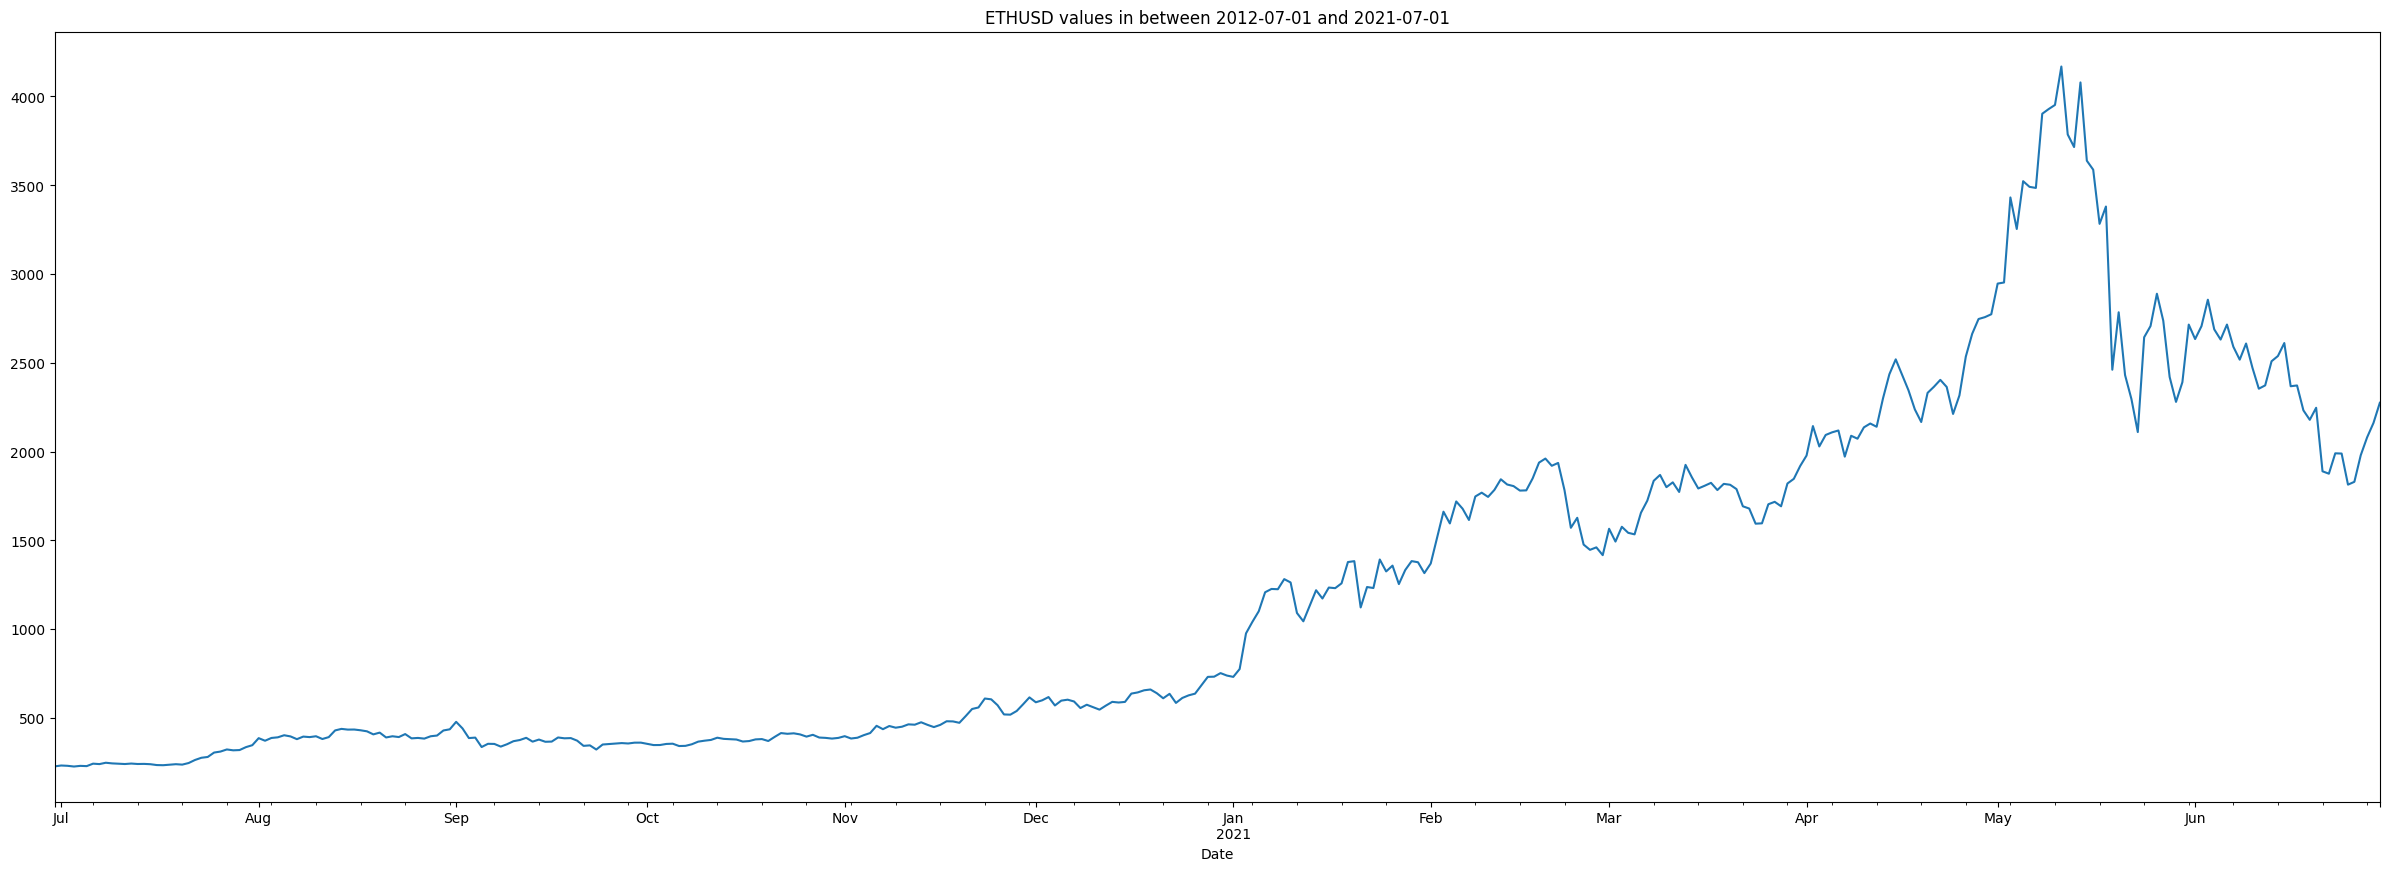

In [21]:
df["Close"].plot(title = "ETHUSD values in between 2012-07-01 and 2021-07-01")

## Final Data

Since the random walk approach emphasizes changes rather than the numeric values themselves, data manipulation (feature generation in that case) is needed

In [22]:
final_df = pd.DataFrame()
final_df["Close"] = df["Close"]
final_df["Change"] = df["Close"].pct_change()

mu = final_df['Change'][1:].mean() 
sigma = final_df['Change'][1:].std()

The dataframe to be used in the random walk process is as it appears

In [23]:
final_df.head()

,Close,Change
Date,,
2020-06-30,226.315002,NaN
2020-07-01,231.113419,0.021202
2020-07-02,229.392197,-0.007448
2020-07-03,225.387070,-0.017460
2020-07-04,229.074112,0.016359


# Random Walk

In [24]:
close_vals = []

close_vals = df["Close"].values

In [25]:
# Number of days to be kept exact same with the root dataset in the random walks
N_days = int(len(df) * 0.2)

# Number of samples (paths/walks) to be generated
N_pred = 10

In [26]:
def arange_prediction_dataframe(prediction_count: int):

    col_names = []

    for curr_iteration in range(prediction_count):

        col_names.append("Prediction" + str(curr_iteration))

    pred_df = pd.DataFrame(columns=col_names)

    return pred_df


pred_df = arange_prediction_dataframe(prediction_count=N_pred)

In [27]:
pred_df

,Prediction0,Prediction1,Prediction2,Prediction3,Prediction4,Prediction5,Prediction6,Prediction7,Prediction8,Prediction9


In [28]:
def arange_first_n_values(n: int):

    for curr in range(n):

        pred_df["Prediction" + str(curr)] = close_vals[:N_days]

arange_first_n_values(n=N_pred)

In [29]:
def generate_random_paths(n: int):

    for curr_pred in range(n):
        # For each prediction

        for curr_index in range(N_pred, len(df)):
            # For each index of the current prediction

            old_price = close_vals[curr_index]
            new_price = old_price * (1 + mu) + old_price * sigma * np.random.normal(0,1)
            pred_df["Prediction" + str(curr_pred)][curr_index] = new_price

generate_random_paths(n=N_pred)

<AxesSubplot:>

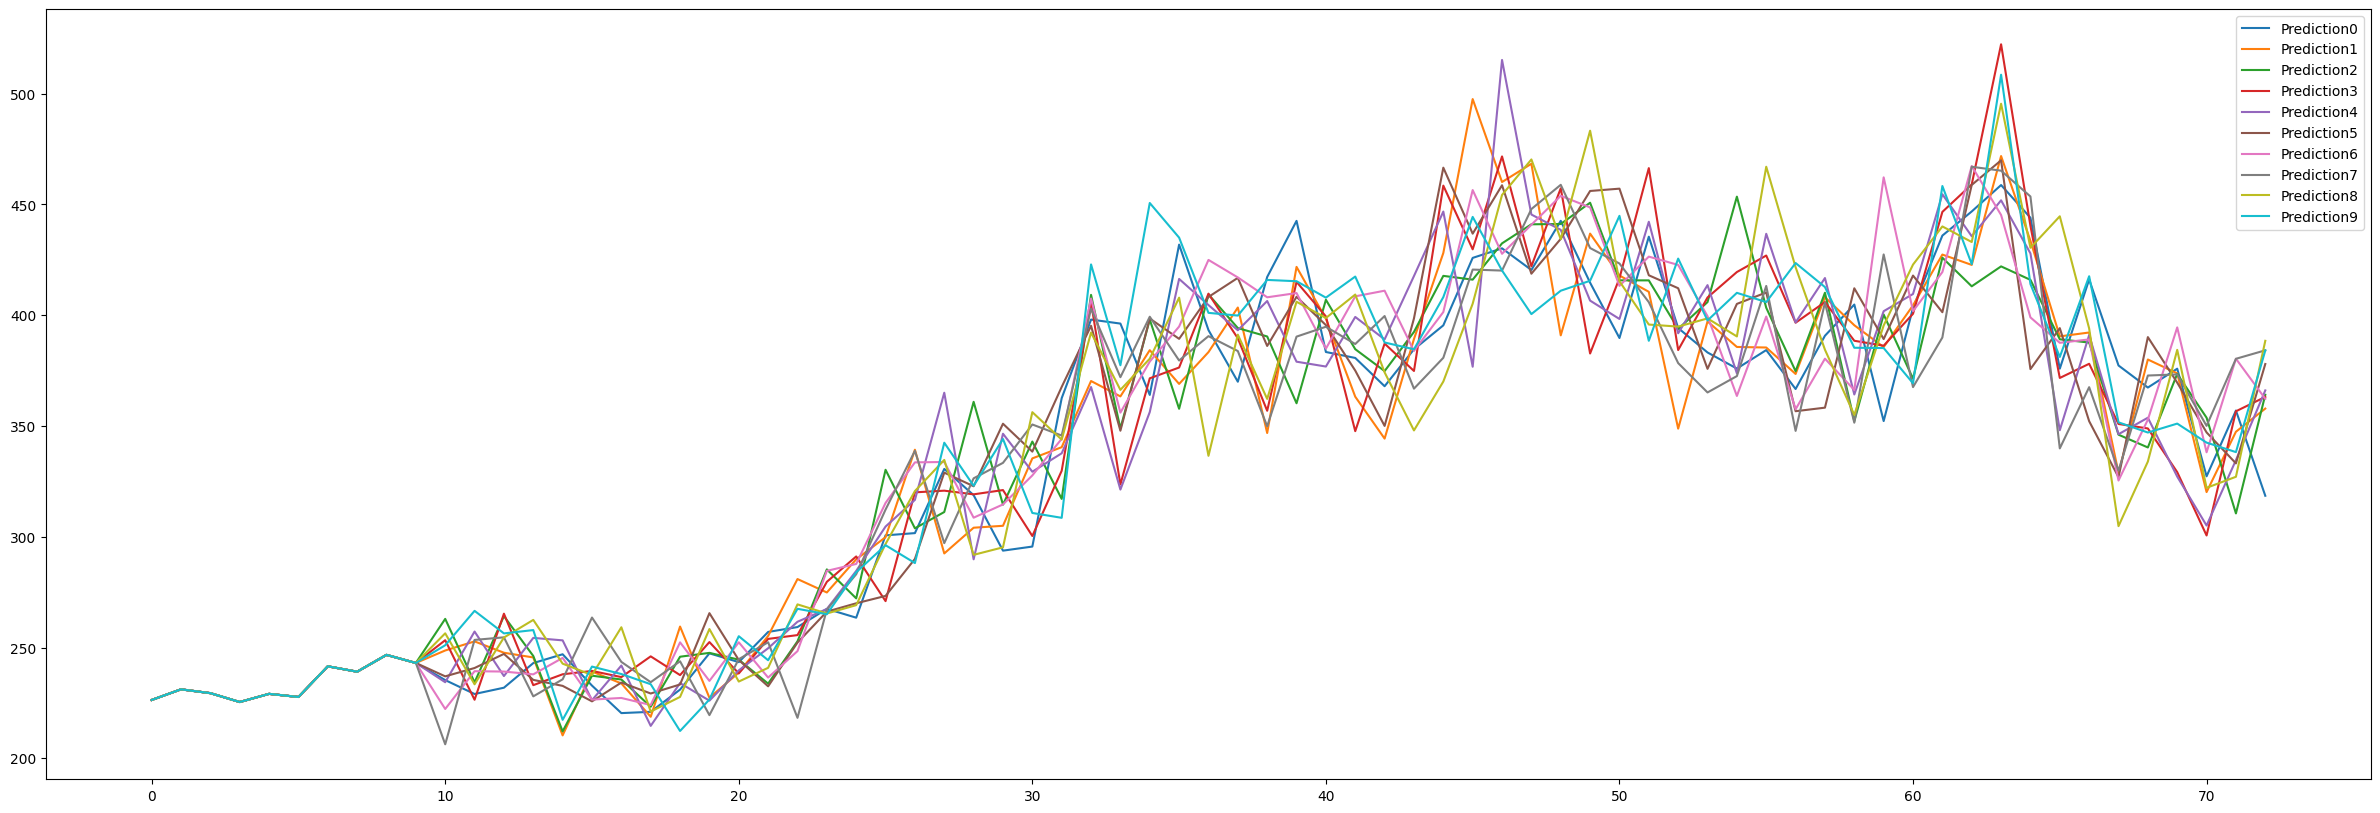

In [30]:
pred_df.plot()